In [181]:
import pandas as pd

In [182]:
listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')
reviews = pd.read_csv('reviews.csv')


/Users/cen3t4m/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (61,62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [183]:
tabs = [listings,calendar, reviews]
for x in tabs:
    print( x.shape)

(74815, 96)
(27307475, 4)
(1137324, 6)


In [184]:
(listings.isnull().sum()/len(listings)).describe().loc['mean']+(listings.isnull().sum()/len(listings)).describe().loc['std']


0.4979379563768026

In [185]:
ldropcols = listings.loc[:,listings.isnull().mean().sort_values(ascending=False)>.50].columns

In [186]:
listings.drop(columns=ldropcols, inplace=True)

In [187]:
listings.shape

(74815, 85)

In [188]:
listings.drop(columns=list(x for x in listings.columns if 'url' in x), inplace=True)

In [189]:
listings.shape

(74815, 80)

In [190]:
listings.columns

Index(['id', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview',
       'transit', 'access', 'interaction', 'house_rules', 'host_id',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'has_availabilit

In [191]:

ldropcols2 = listings.loc[:,listings.isnull().mean(axis=0).sort_values(ascending=False)>.30]
listings.drop(columns=ldropcols2, inplace=True)

In [192]:
(listings.isnull().mean(axis=1)).describe()

count    74815.000000
mean         0.050824
std          0.065814
min          0.000000
25%          0.000000
50%          0.014286
75%          0.128571
max          0.300000
dtype: float64

In [193]:
listings.shape

(74815, 70)

In [194]:
(listings.isnull().sum(axis=1)).describe()

count    74815.000000
mean         3.557669
std          4.606955
min          0.000000
25%          0.000000
50%          1.000000
75%          9.000000
max         21.000000
dtype: float64

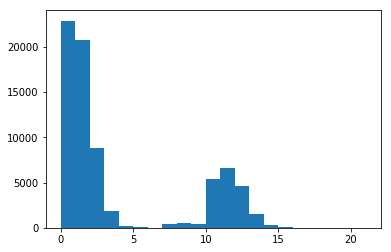

In [195]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist((listings.isnull().sum(axis=1)), bins=21)
plt.show()

In [196]:
listings.isnull().sum(axis=1).value_counts().sort_index()

0     22896
1     20752
2      8819
3      1899
4       246
5        68
6        32
7       416
8       577
9       436
10     5420
11     6632
12     4671
13     1557
14      312
15       65
16        5
19        2
20        4
21        6
dtype: int64

In [197]:
dfmiss = listings.loc[((listings.isnull().sum(axis=1))>8),:]
dfmiss.isnull().mean(axis=0).sort_values(ascending=False)

review_scores_location              0.999320
review_scores_value                 0.999320
review_scores_accuracy              0.999320
review_scores_cleanliness           0.999320
review_scores_checkin               0.999320
review_scores_communication         0.999320
review_scores_rating                0.999110
first_review                        0.969597
reviews_per_month                   0.969597
last_review                         0.969021
cleaning_fee                        0.474307
host_neighbourhood                  0.309367
state                               0.246102
summary                             0.073051
neighbourhood                       0.036368
zipcode                             0.030194
description                         0.029356
market                              0.014076
host_location                       0.008530
bathrooms                           0.006175
beds                                0.005390
host_listings_count                 0.001308
host_ident

In [198]:
dfmiss.isnull().mean(axis=0).sort_values(ascending=False)

review_scores_location              0.999320
review_scores_value                 0.999320
review_scores_accuracy              0.999320
review_scores_cleanliness           0.999320
review_scores_checkin               0.999320
review_scores_communication         0.999320
review_scores_rating                0.999110
first_review                        0.969597
reviews_per_month                   0.969597
last_review                         0.969021
cleaning_fee                        0.474307
host_neighbourhood                  0.309367
state                               0.246102
summary                             0.073051
neighbourhood                       0.036368
zipcode                             0.030194
description                         0.029356
market                              0.014076
host_location                       0.008530
bathrooms                           0.006175
beds                                0.005390
host_listings_count                 0.001308
host_ident

In [199]:
###from above notice the high null properties haven't been reviewed 
listings.dropna(subset=['first_review'], how='all', inplace=True)

In [200]:
listings.dropna(subset=['review_scores_rating'], how='all', inplace=True)

In [201]:
listings.shape

(54750, 70)

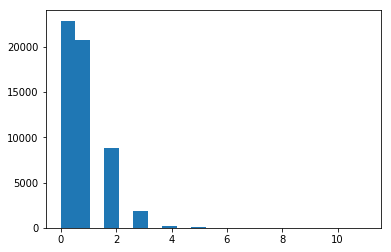

In [202]:
plt.hist((listings.isnull().sum(axis=1)), bins=21)
plt.show()

In [203]:

listings.isnull().mean(axis=0).sort_values(ascending=False)

state                               0.238539
host_neighbourhood                  0.233534
cleaning_fee                        0.215123
neighbourhood                       0.058941
summary                             0.027689
zipcode                             0.025699
market                              0.012201
description                         0.008603
review_scores_value                 0.002667
review_scores_location              0.002575
review_scores_checkin               0.002539
host_location                       0.002228
review_scores_accuracy              0.001333
review_scores_communication         0.001242
city                                0.001151
bathrooms                           0.001096
review_scores_cleanliness           0.001023
beds                                0.000986
bedrooms                            0.000530
host_since                          0.000237
host_is_superhost                   0.000237
host_listings_count                 0.000237
host_total

In [204]:
listings['state'].unique()

array([nan, 'Greater London', 'Fitzrovia', 'London', 'England',
       'United Kingdom', 'Fulham', 'sw18 5pu',
       '27 Richbell, Boswell Street', 'UK', 'Hampstead', 'Walthamstow',
       'Shoreditch', 'London ', 'london', 'uk', 'Surrey', 'Hackney',
       'LND', 'Harringay', 'Essex', 'essex', 'Lewisham', 'middx', 'Middx',
       'Surbiton', 'Loomsbury', 'East Sheen', 'Middlsex', 'middlesex',
       'Select county', 'Kensington', 'Kensington Olympia', 'Middlesex',
       'Battersea', 'LONDON', 'Uk', 'Harringey', 'Wimbledon',
       'Stoke Newington', 'London is not in any county', '.',
       'South Kensington', 'Kentish Town', 'greater london', 'Ealing',
       'Oxford Street', 'Pimlico', 'Chiswick', 'Tower hamlets', 'Kent',
       'Hendon', 'londom', 'Tulse hill', 'Angel', 'Wandsworth',
       'Islington', 'Kensal Rise', 'Great Britain', 'Kingston',
       'Greenwich', 'Finsbury Park', 'EAST HAM', 'leytonstone',
       'Bethnal green', 'Bow', 'Londom', 'WALTHAMSTOW', 'Notting Hill'

In [205]:

listings.drop(columns=['state','host_neighbourhood'], inplace=True)

In [206]:
listings.shape

(54750, 68)

In [207]:
listings.isnull().sum().sort_values(ascending=False)

cleaning_fee                        11778
neighbourhood                        3227
summary                              1516
zipcode                              1407
market                                668
description                           471
review_scores_value                   146
review_scores_location                141
review_scores_checkin                 139
host_location                         122
review_scores_accuracy                 73
review_scores_communication            68
city                                   63
bathrooms                              60
review_scores_cleanliness              56
beds                                   54
bedrooms                               29
host_total_listings_count              13
host_identity_verified                 13
host_has_profile_pic                   13
host_listings_count                    13
host_is_superhost                      13
host_since                             13
host_name                         

In [208]:
listings['cleaning_fee'] = listings['cleaning_fee'].fillna(0)


In [209]:

listings['neighbourhood_cleansed'].unique()
listings['summary'].unique()
listings['market'].unique()

listings.drop(columns=['summary','market','neighbourhood','zipcode'], inplace=True)

In [210]:

target = listings['review_scores_rating']
features = listings.drop('review_scores_rating', axis = 1)
features.drop(columns='id',inplace=True)

In [211]:
target.to_csv('target.csv')
features.to_csv('features.csv')

In [212]:
features = pd.read_csv('features.csv', index_col=0)
target = pd.read_csv('target.csv',index_col=0, header=None)

In [213]:
#remove cols with only one value
arr = []
for col in features.columns:
    if len(features[col].unique())==1:
        arr.append(col)

features.drop(columns=arr, inplace=True)

In [214]:

features.shape

(54750, 56)

In [215]:
host_col = [col for col in features.columns.values if 'host' in col]
host_col

['host_id',
 'host_name',
 'host_since',
 'host_location',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'calculated_host_listings_count']

In [216]:
features.drop(columns=host_col, inplace=True)

In [217]:
###could do with making a data dic
##skim for address based cols as reduncant 
features.columns
features.drop(columns=['city', 'smart_location', 'latitude',
       'longitude','street'], inplace=True)


In [218]:
features.head()

,last_scraped,name,description,experiences_offered,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2018-11-05,"Cozy, 3 minutes to Piccadilly Line",PLEASE CONTACT ME BEFORE BOOKING Homely apartm...,none,Haringey,f,Apartment,Private room,2,NaN,...,9.0,10.0,10.0,9.0,10.0,f,strict_14_with_grace_period,t,f,1.67
1,2018-11-05,The Sanctuary,The room has a double bed and a single foldawa...,none,Ealing,t,Apartment,Private room,2,NaN,...,9.0,10.0,9.0,9.0,9.0,t,strict_14_with_grace_period,f,f,0.10
2,2018-11-05,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,business,Islington,t,Apartment,Private room,2,1.0,...,10.0,9.0,10.0,9.0,9.0,f,moderate,f,f,0.14
3,2018-11-05,Superb 3-Bed/2 Bath & Wifi: Trendy W1,"Open from June 2018 after a 3-year break, we a...",none,Westminster,t,Apartment,Entire home/apt,6,2.0,...,9.0,9.0,9.0,10.0,9.0,f,strict_14_with_grace_period,f,f,0.42
4,2018-11-05,Battersea 2 bedroom house & parking,"Artist house, high ceiling bedrooms, private p...",family,Wandsworth,t,Townhouse,Entire home/apt,4,1.5,...,10.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,t,t,0.95


In [219]:

data_dict=[(x,features[x][1]) for x in features.columns.values]
data_dict=pd.DataFrame(data_dict, columns=['column_name','sample_value'])
data_dict.set_index('column_name',inplace=True)
#check types of values in each column - add new column of value_type to our data dictionary
data_dict['value_type']=[type(x) for x in data_dict['sample_value']]
#check how many unique values are in each column for categorical variables encoding
data_dict['nunique']=[features[col].nunique() for col in data_dict.index.values]
data_dict['%nulls']=[features[col].isnull().mean()*100 for col in data_dict.index.values]
data_dict

,sample_value,value_type,nunique,%nulls
column_name,,,,
last_scraped,2018-11-05,<class 'str'>,3,0.000000
name,The Sanctuary,<class 'str'>,53610,0.014612
description,The room has a double bed and a single foldawa...,<class 'str'>,52650,0.860274
experiences_offered,none,<class 'str'>,5,0.000000
neighbourhood_cleansed,Ealing,<class 'str'>,33,0.000000
is_location_exact,t,<class 'str'>,2,0.000000
property_type,Apartment,<class 'str'>,36,0.000000
room_type,Private room,<class 'str'>,3,0.000000
accommodates,2,<class 'numpy.int64'>,16,0.000000


In [220]:
#binary_cols = data_dict['column_name'][[data_dict['nunique']==2]]
binary_cols = data_dict.index[data_dict['nunique']==2]
binary_cols

Index(['is_location_exact', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object', name='column_name')

In [221]:
def binar(v):
    if v =='t':
        return 1 
    else:
        return 0

        
for x in binary_cols:
    features[x] = features[x].apply(binar)



In [222]:
features['property_type'].unique()

array(['Apartment', 'Townhouse', 'House', 'Condominium',
       'Bed and breakfast', 'Serviced apartment', 'Aparthotel', 'Loft',
       'Guest suite', 'Boat', 'Guesthouse', 'Bungalow', 'Cottage',
       'Other', 'Tiny house', 'Villa', 'Nature lodge', 'Cabin', 'Yurt',
       'Parking Space', 'Hostel', 'Camper/RV', 'Hut', 'Boutique hotel',
       'Hotel', 'Chalet', 'Earth house', 'Barn', 'Houseboat',
       'Ryokan (Japan)', 'Island', 'Treehouse',
       "Shepherd's hut (U.K., France)", 'Casa particular (Cuba)',
       'Farm stay', 'Tent'], dtype=object)

In [108]:
encode_cols=['property_type','room_type','bed_type','cancellation_policy']
features=pd.get_dummies(data=features, columns=encode_cols,drop_first=True)

In [109]:
features.head()

,last_scraped,name,description,experiences_offered,neighbourhood_cleansed,is_location_exact,accommodates,bathrooms,bedrooms,beds,...,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,2018-11-05,"Cozy, 3 minutes to Piccadilly Line",PLEASE CONTACT ME BEFORE BOOKING Homely apartm...,none,Haringey,0,2,NaN,1.0,1.0,...,0,0,0,0,1,0,0,1,0,0
1,2018-11-05,The Sanctuary,The room has a double bed and a single foldawa...,none,Ealing,1,2,NaN,1.0,1.0,...,0,0,0,0,1,0,0,1,0,0
2,2018-11-05,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,business,Islington,1,2,1.0,1.0,1.0,...,0,0,0,0,1,1,0,0,0,0
3,2018-11-05,Superb 3-Bed/2 Bath & Wifi: Trendy W1,"Open from June 2018 after a 3-year break, we a...",none,Westminster,1,6,2.0,3.0,3.0,...,0,0,0,0,1,0,0,1,0,0
4,2018-11-05,Battersea 2 bedroom house & parking,"Artist house, high ceiling bedrooms, private p...",family,Wandsworth,1,4,1.5,2.0,2.0,...,0,0,0,0,1,0,0,1,0,0


In [110]:
#strip columns of dollar signs
cols=['price','cleaning_fee','extra_people']
features[cols]=features[cols].replace('[\$,]', '', regex=True).astype(float)
features[cols].head(5)

,price,cleaning_fee,extra_people
0,35.0,7.0,15.0
1,70.0,0.0,35.0
2,55.0,15.0,15.0
3,300.0,65.0,10.0
4,150.0,70.0,15.0


In [111]:

drop_cols=['name','description']
features.drop(columns=drop_cols, inplace=True)

In [112]:
still_missing = features.loc[:,features.isnull().sum(axis=0).sort_values(ascending=False)>0].columns

In [113]:
features[still_missing].dtypes

bathrooms                      float64
bedrooms                       float64
beds                           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
dtype: object

In [114]:
from sklearn.preprocessing import Imputer
imp=Imputer(strategy='median')
imp.fit_transform(features[still_missing])
features[still_missing] = imp.fit_transform(features[still_missing])

In [115]:
features.shape

(54750, 80)

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [117]:
features.columns[features.dtypes == 'object']

Index(['last_scraped', 'experiences_offered', 'neighbourhood_cleansed',
       'amenities', 'calendar_updated', 'calendar_last_scraped',
       'first_review', 'last_review'],
      dtype='object')

amenites.unique()

In [118]:
features['experiences_offered'].unique()

array(['none', 'business', 'family', 'social', 'romantic'], dtype=object)

In [119]:
encode_cols=['experiences_offered','neighbourhood_cleansed']
features=pd.get_dummies(data=features, columns=encode_cols,drop_first=True)

In [120]:
features.drop(columns=features.columns[features.dtypes == 'object'], inplace=True)


In [121]:

scaler=StandardScaler()
feature_scaled=scaler.fit_transform(features)



In [122]:
feature_scaled = pd.DataFrame(feature_scaled)

In [123]:
feature_scaled.columns = features.columns

In [124]:
feature_scaled

,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,...,neighbourhood_cleansed_Merton,neighbourhood_cleansed_Newham,neighbourhood_cleansed_Redbridge,neighbourhood_cleansed_Richmond upon Thames,neighbourhood_cleansed_Southwark,neighbourhood_cleansed_Sutton,neighbourhood_cleansed_Tower Hamlets,neighbourhood_cleansed_Waltham Forest,neighbourhood_cleansed_Wandsworth,neighbourhood_cleansed_Westminster
0,-1.336033,-0.608987,-0.465309,-0.444589,-0.615020,-0.564297,-0.638085,-0.461776,0.514046,-0.214637,...,-0.124221,-0.152353,-0.084153,-0.122773,-0.261369,-0.055479,-0.334415,-0.124977,-0.226601,-0.349146
1,0.748485,-0.608987,-0.465309,-0.444589,-0.615020,-0.262918,-0.832915,0.343878,1.999635,-0.132963,...,-0.124221,-0.152353,-0.084153,-0.122773,-0.261369,-0.055479,-0.334415,-0.124977,-0.226601,-0.349146
2,0.748485,-0.608987,-0.465309,-0.444589,-0.615020,-0.392080,-0.415422,-0.461776,0.514046,-0.214637,...,-0.124221,-0.152353,-0.084153,-0.122773,-0.261369,-0.055479,-0.334415,-0.124977,-0.226601,-0.349146
3,0.748485,1.444599,1.240404,1.866031,1.019322,1.717575,0.976218,1.955186,0.142649,-0.051288,...,-0.124221,-0.152353,-0.084153,-0.122773,-0.261369,-0.055479,-0.334415,-0.124977,-0.226601,2.864128
4,0.748485,0.417806,0.387548,0.710721,0.202151,0.425949,1.115382,0.343878,0.514046,7.054375,...,-0.124221,-0.152353,-0.084153,-0.122773,-0.261369,-0.055479,-0.334415,-0.124977,4.413042,-0.349146
5,0.748485,0.417806,-0.465309,0.710721,0.202151,-0.305972,0.558726,0.343878,0.216929,0.112060,...,-0.124221,-0.152353,-0.084153,-0.122773,-0.261369,-0.055479,-0.334415,-0.124977,4.413042,-0.349146
6,0.748485,-0.608987,0.387548,-0.444589,-0.615020,-0.615962,-0.832915,-0.461776,-0.005910,0.928803,...,-0.124221,-0.152353,-0.084153,-0.122773,-0.261369,-0.055479,-0.334415,-0.124977,-0.226601,-0.349146
7,0.748485,0.417806,-0.465309,-0.444589,1.019322,0.425949,1.226713,1.955186,0.142649,-0.051288,...,-0.124221,-0.152353,-0.084153,-0.122773,-0.261369,-0.055479,-0.334415,-0.124977,-0.226601,-0.349146
8,0.748485,-1.122383,-0.465309,-0.444589,-0.615020,-0.219864,-0.137094,-0.461776,-0.600145,-0.214637,...,-0.124221,-0.152353,-0.084153,-0.122773,-0.261369,-0.055479,-0.334415,-0.124977,-0.226601,-0.349146
9,-1.336033,-0.095590,-0.465309,-0.444589,0.202151,-0.435135,-0.137094,-0.461776,0.514046,-0.051288,...,-0.124221,-0.152353,-0.084153,-0.122773,-0.261369,-0.055479,2.990300,-0.124977,-0.226601,-0.349146


In [125]:
from sklearn.model_selection import train_test_split
#split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [142]:
mod = LinearRegression()
mod.fit(X_train,y_train)
mod.score(X_train,y_train)
mean_squared_error(mod.predict(X_train),y_train)


22.91859010587961

In [128]:
y_preds = mod.predict(X_test)


In [131]:
from sklearn.metrics import mean_squared_error

In [138]:
mean_squared_error(y_preds,y_test)

23.60273604574465

In [143]:
mod.score(X_test,y_test)

0.7493811364206476

In [178]:
ddd= pd.DataFrame(index=X_test.columns)
ddd['coef'] = mod.coef_

ValueError: Length of values does not match length of index

In [179]:
featur_imp = pd.DataFrame(mod.coef_.transpose(), index=X_train.columns, columns=['coef'])


In [180]:
featur_imp.sort_values(ascending=False, by='coef')

,coef
property_type_Treehouse,6.281735
property_type_Island,4.467782
property_type_Barn,4.188527
property_type_Nature lodge,3.695941
property_type_Houseboat,3.333095
property_type_Casa particular (Cuba),2.875147
property_type_Earth house,2.847802
property_type_Camper/RV,2.762887
review_scores_value,2.728921
property_type_Boutique hotel,2.592154


KeyError: 0

In [59]:
calendar.isnull().mean().sort_values(ascending=False)

price         0.661329
available     0.000000
date          0.000000
listing_id    0.000000
dtype: float64

In [223]:
calendar.drop(columns='price', inplace=True)

In [236]:
popular = calendar.copy()

popular=popular[popular['available']=='f']
popular['date'] = pd.to_datetime(popular['date'])


popular=popular.groupby('date')['listing_id'].count()

In [245]:
popular['month']=(popular.index.strftime('%B'))

In [246]:
popular

date
2018-11-04 00:00:00                                                 6578
2018-11-05 00:00:00                                                65546
2018-11-06 00:00:00                                                61278
2018-11-07 00:00:00                                                58663
2018-11-08 00:00:00                                                57082
2018-11-09 00:00:00                                                58093
2018-11-10 00:00:00                                                58767
2018-11-11 00:00:00                                                54352
2018-11-12 00:00:00                                                52416
2018-11-13 00:00:00                                                52477
2018-11-14 00:00:00                                                52769
2018-11-15 00:00:00                                                53501
2018-11-16 00:00:00                                                55353
2018-11-17 00:00:00                           

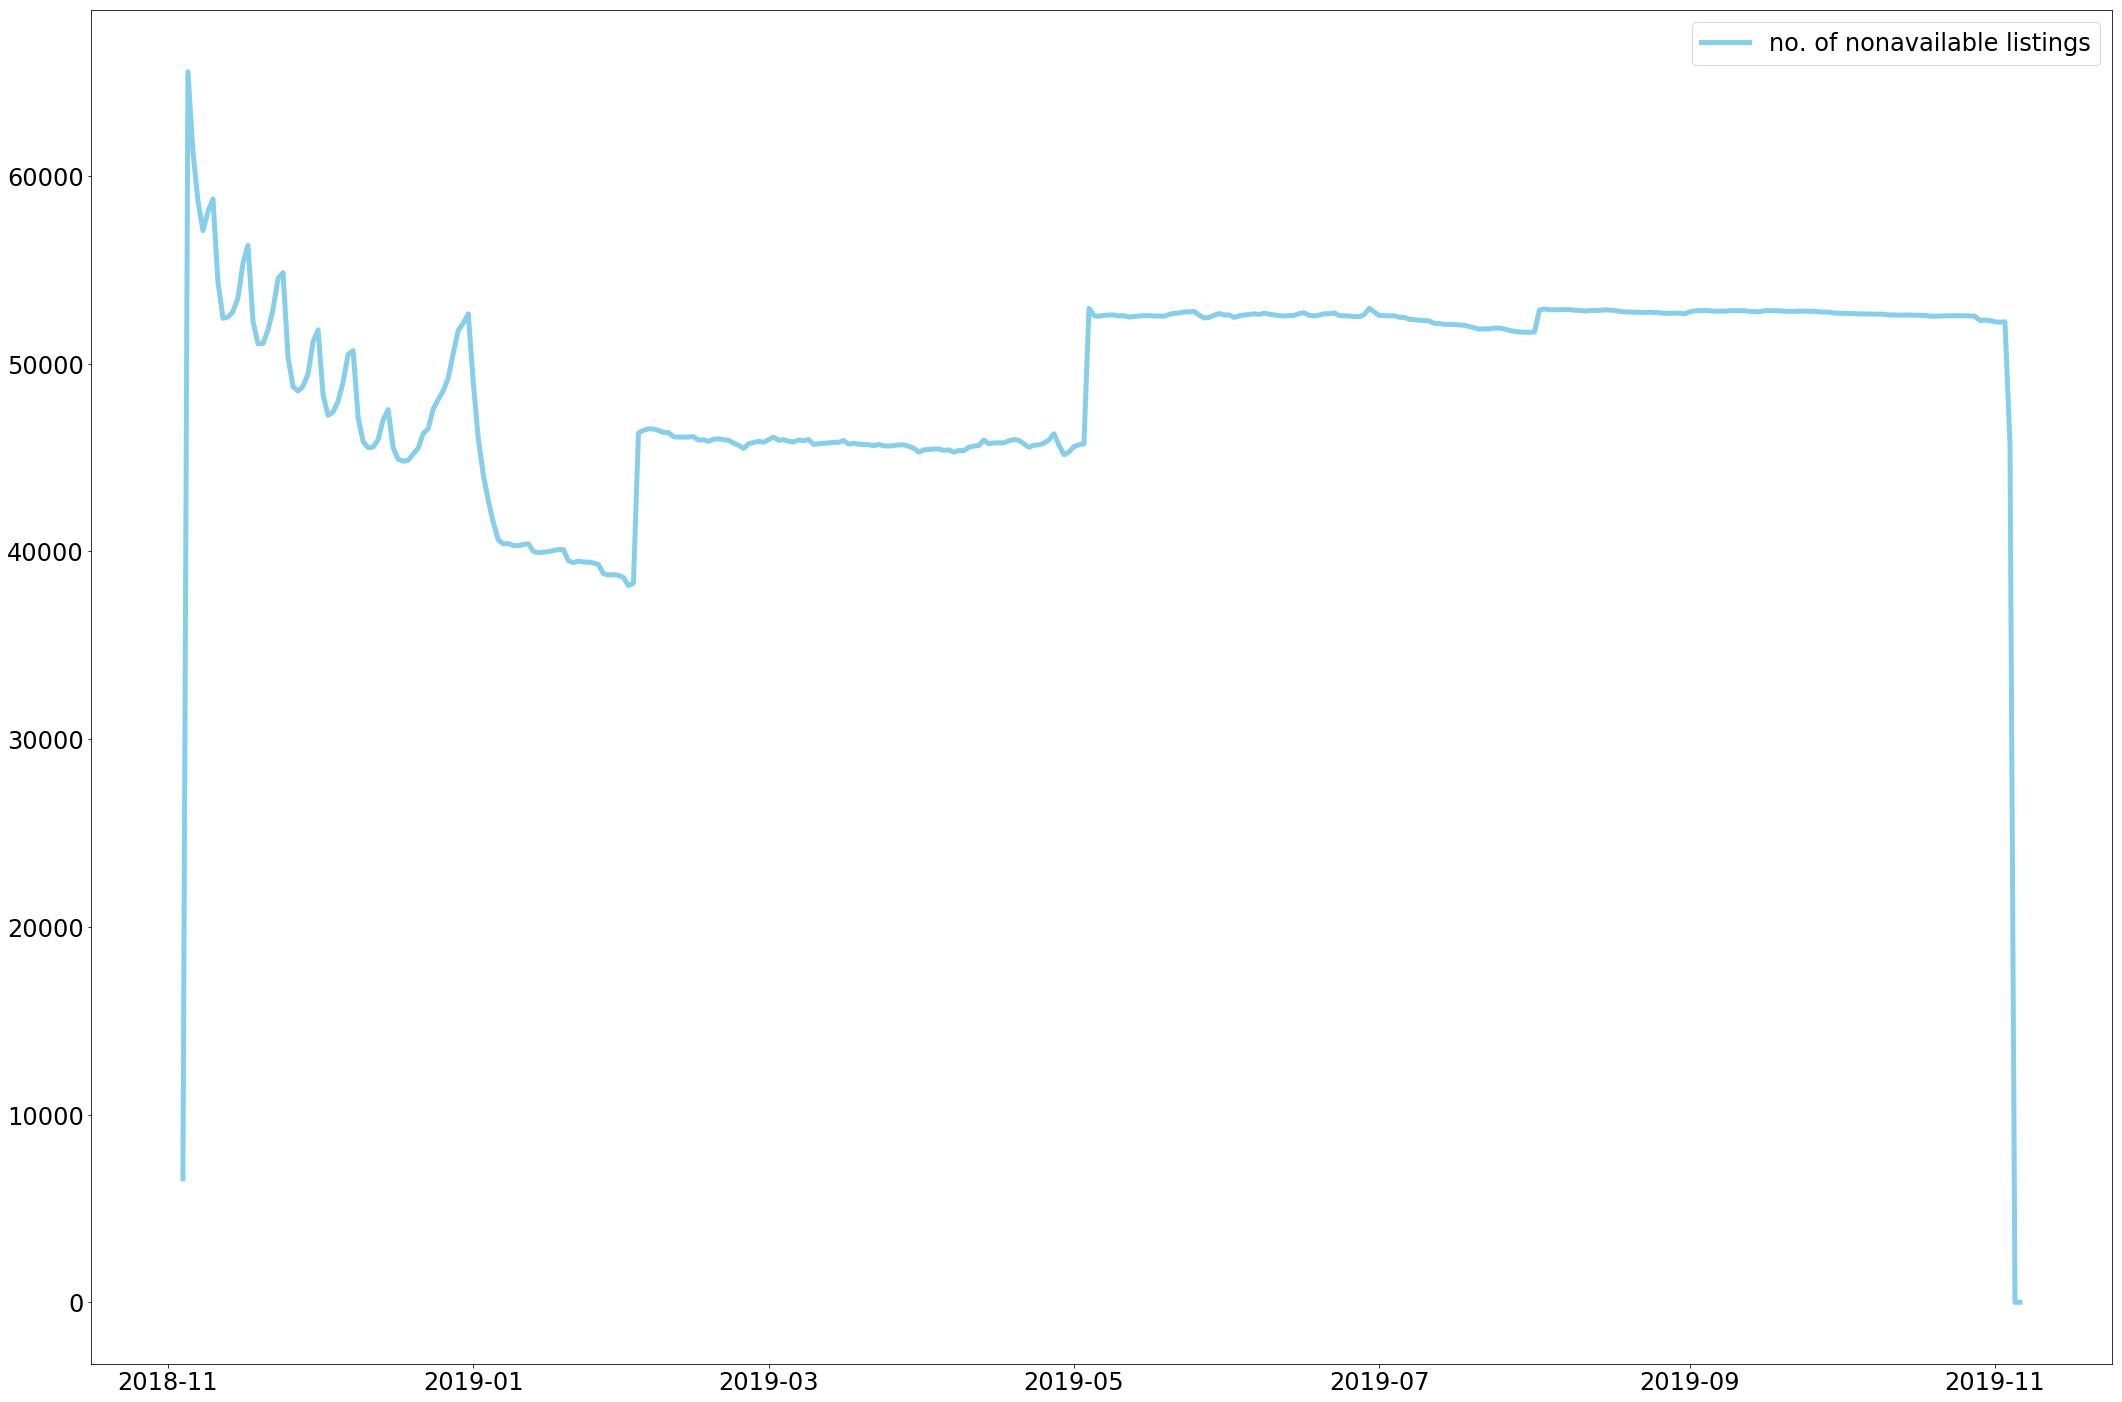

In [237]:
# Data
df=pd.DataFrame({'date': popular.index, 'no. of nonavailable listings': popular.values })

# plot trend of unavailable listings
plt.figure(figsize=(30,20))
locs, labels = plt.xticks()
plt.rcParams.update({'font.size': 24})
plt.plot( 'date', 'no. of nonavailable listings', data=df, marker='', markerfacecolor='blue', color='skyblue', linewidth=5)
plt.legend()
plt.tight_layout()

In [229]:
popular.sort_values(ascending=False).head(10)

date
2018-11-05    65546
2018-11-06    61278
2018-11-10    58767
2018-11-07    58663
2018-11-09    58093
2018-11-08    57082
2018-11-17    56300
2018-11-16    55353
2018-11-24    54837
2018-11-23    54534
Name: listing_id, dtype: int64

In [60]:
reviews.isnull().mean().sort_values(ascending=False)

comments         0.001168
reviewer_name    0.000000
reviewer_id      0.000000
date             0.000000
id               0.000000
listing_id       0.000000
dtype: float64

In [250]:
#get copy of dataset
calendar_rev=calendar.copy()

#rename id column to merge on
calendar_rev.rename(columns={'listing_id': 'id'},inplace=True)

#convert listings price data into string, get subset of listings data
listings['price']=listings['price'].replace('[\$,]', '', regex=True).astype(float)
listings_price=listings[['id','price']]

#merge datasets
result_price = pd.merge(calendar_rev, listings_price, how='left', on=['id'])

In [251]:
result_price

,id,date,available,price
0,9554,2019-08-18,t,35.0
1,97446,2019-11-04,f,161.0
2,97446,2019-11-03,f,161.0
3,97446,2019-11-02,f,161.0
4,97446,2019-11-01,f,161.0
5,97446,2019-10-31,f,161.0
6,97446,2019-10-30,f,161.0
7,97446,2019-10-29,f,161.0
8,97446,2019-10-28,f,161.0
9,97446,2019-10-27,f,161.0
